In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import copy

from test_simplify import test_basic, load_net, batch_predict
from test_batch import collect_predict,adaptive_chain_smoother,load_predict

In [3]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [4]:
def plot_trace(x,y, alpha=1.0):
    n = x.shape[0]
    plt.plot(x[:n//3],y[:n//3],'-o',color='r', alpha=alpha)
    plt.plot(x[n//3:n//3*2],y[n//3:n//3*2],'-o',color='g', alpha=alpha)
    plt.plot(x[n//3*2:],y[n//3*2:],'-o',color='b', alpha=alpha)


In [5]:
net = load_net('weights/ssd300_hor_3.pth')

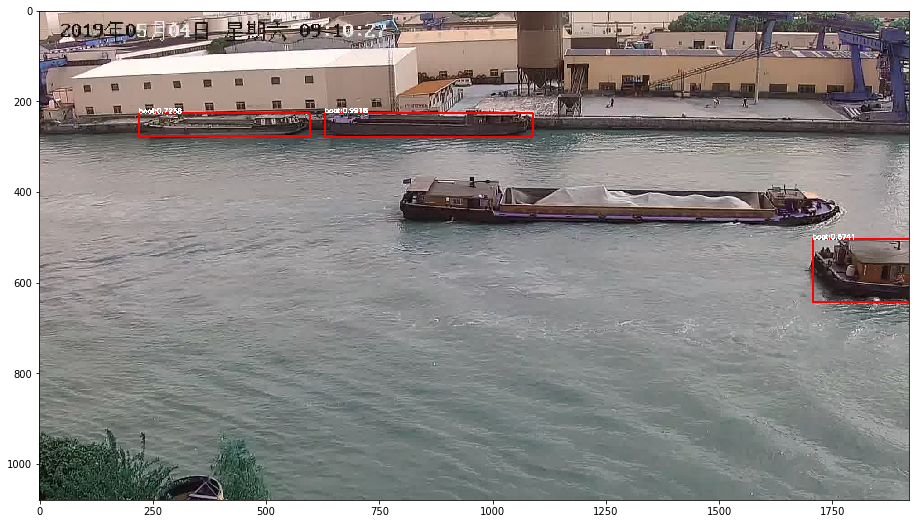

In [6]:
processed = test_basic(net, r'E:\ship_detect_demo\hiv00801_frames\thumb00088.jpg')
plt.figure(figsize=(16,9))
plt.imshow(processed)

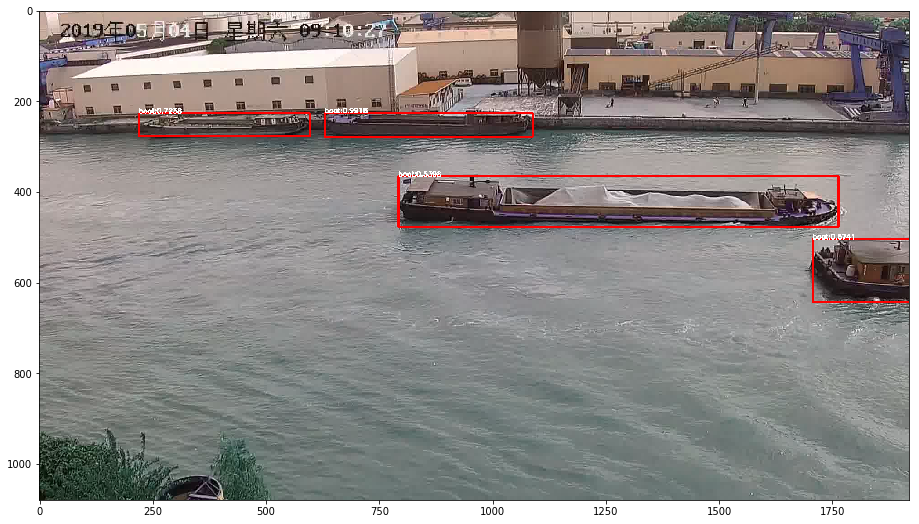

In [7]:
processed = test_basic(net, r'E:\ship_detect_demo\hiv00801_frames\thumb00088.jpg', threshold=0.15)
plt.figure(figsize=(16,9))
plt.imshow(processed)

In [8]:
smoother = lambda arr: adaptive_chain_smoother(arr, F=6)

In [9]:
loaded_raw = load_predict('hiv00803_cache')

In [10]:
loaded = copy.deepcopy(loaded_raw)
collected = collect_predict(loaded, chain_smoother=smoother, jump_tol=60, verbose=True)
sorted([len(chain) for chain in collected['chain_list']], reverse=True)

13 chain detected


[12951, 12951, 2327, 2230, 2180, 1325, 1173, 1152, 1056, 1038, 1020, 947, 2]

12951


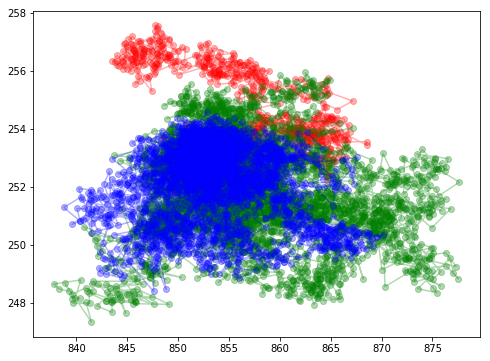

12951


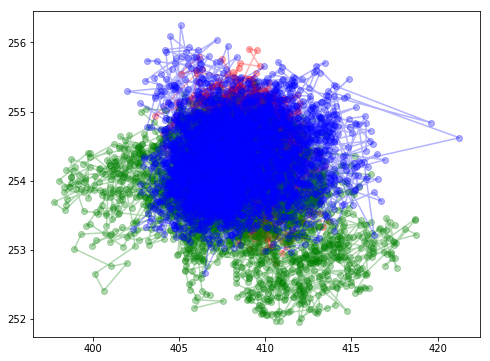

2327


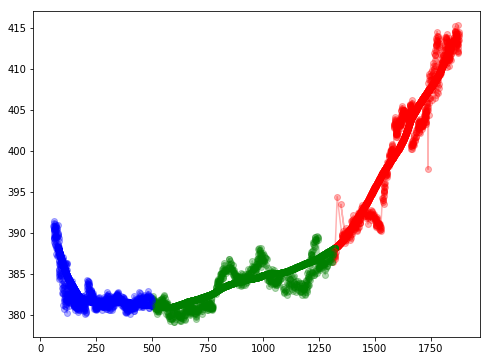

2230


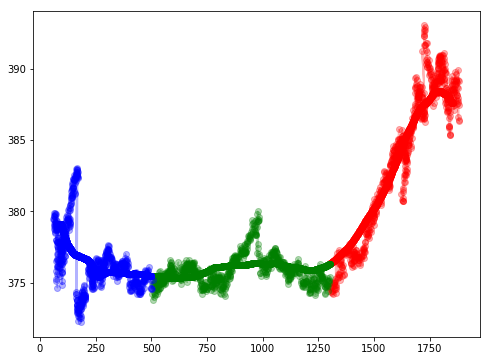

2180


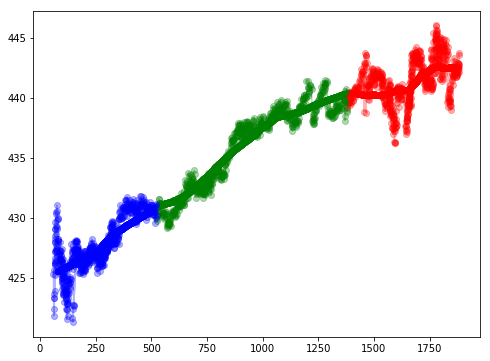

1325


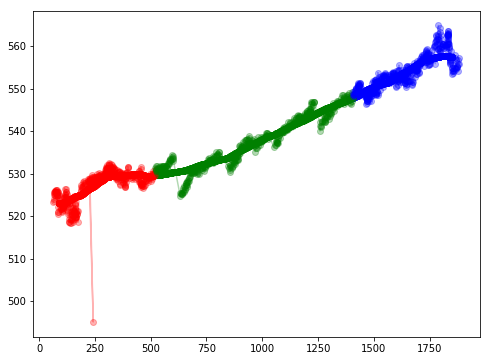

1173


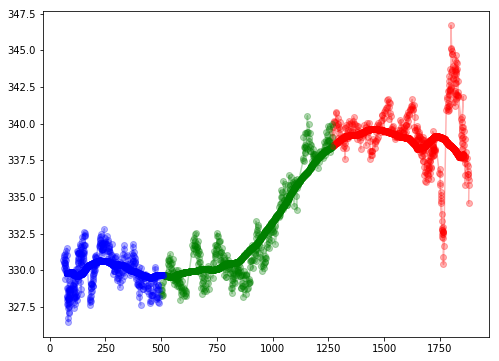

1152


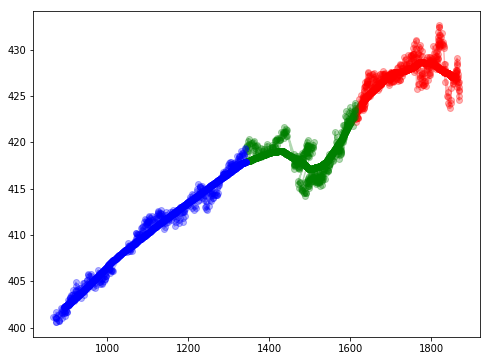

1056


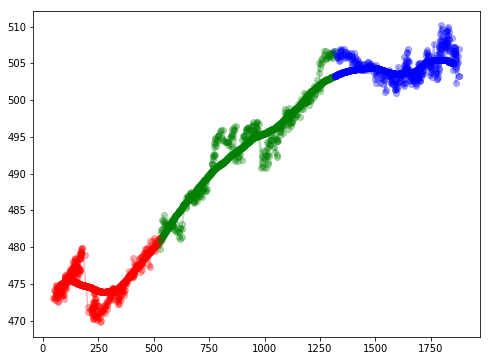

1038


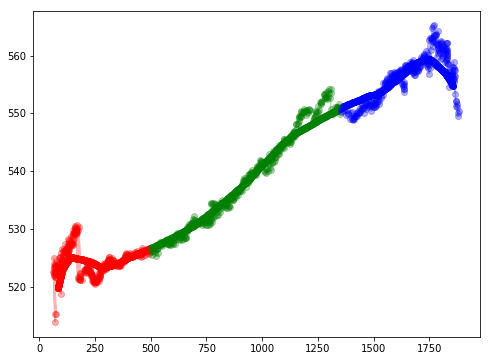

1020


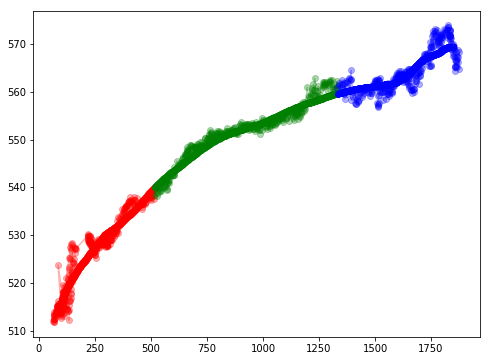

947


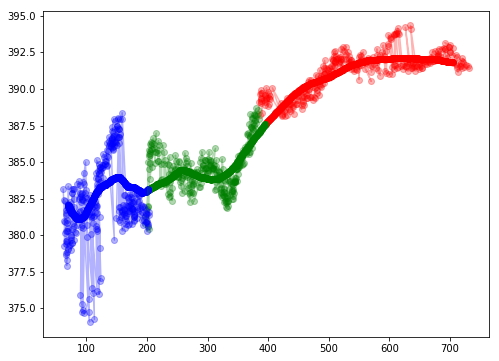

2


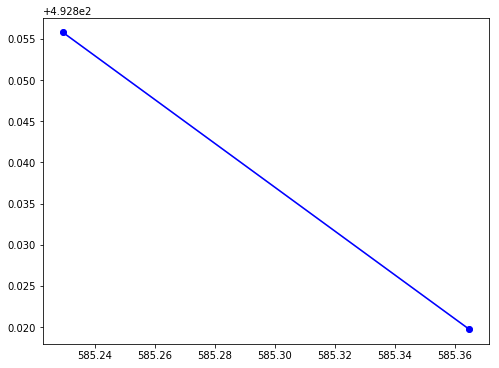

In [11]:
for chain in sorted([chain for chain in collected['chain_list']], reverse=True, key=len)[:21]:
    pt_arr = np.array([box['pt'] for box in chain])
    pt_smoothed_arr = np.array([box['pt_smoothed'] for box in chain])
    if len(pt_arr) <2:
        print('suppressed')
        continue
    print(len(pt_arr))
    x,y = pt_arr[:,::2].mean(axis=1),pt_arr[:,1::2].mean(axis=1)
    x_bar,y_bar = pt_smoothed_arr[:,::2].mean(axis=1),pt_smoothed_arr[:,1::2].mean(axis=1)
    
    plt.figure(figsize=(8,6))
    plot_trace(x_bar, y_bar)
    plot_trace(x,y, alpha=0.3)
    plt.show()

In [12]:
background_bgr = cv2.imread('hor_background2.jpg')
background = cv2.cvtColor(background_bgr, cv2.COLOR_BGR2RGB)

0 12951


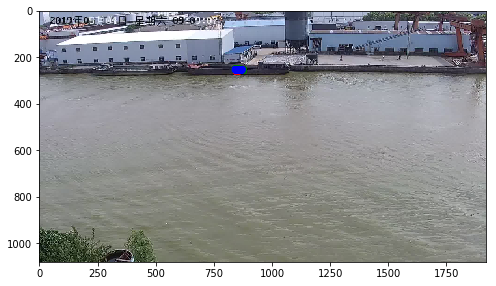

1 12951


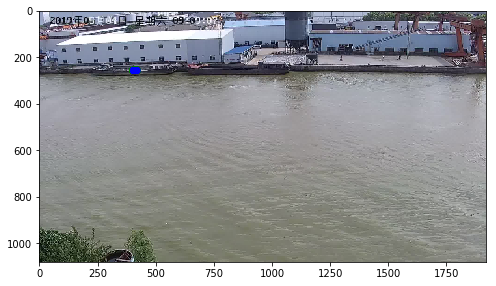

2 2327


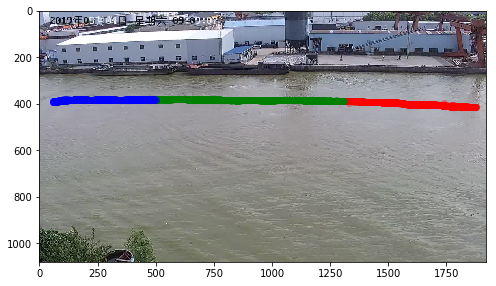

3 2230


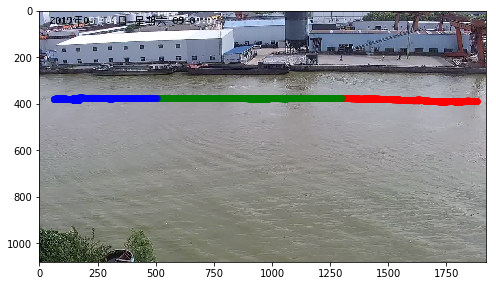

4 2180


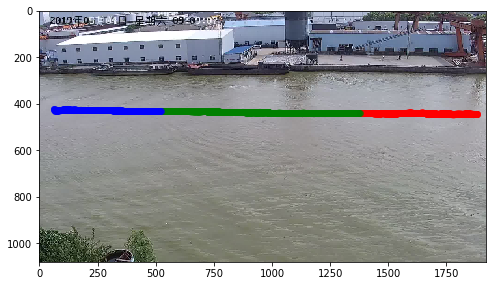

5 1325


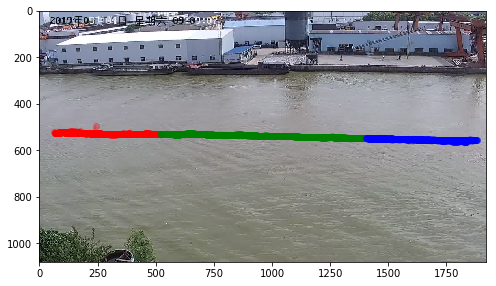

6 1173


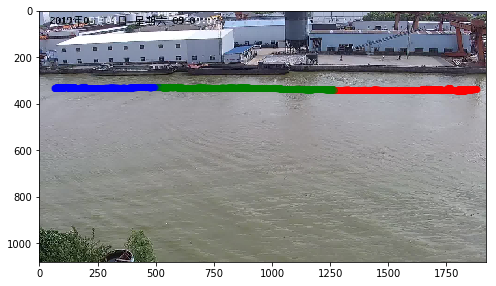

7 1152


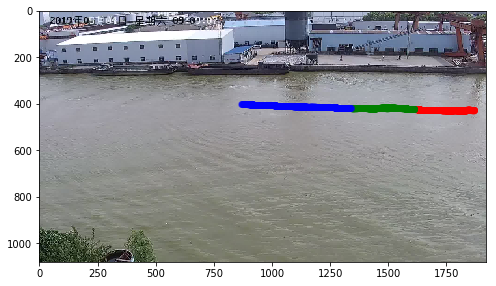

8 1056


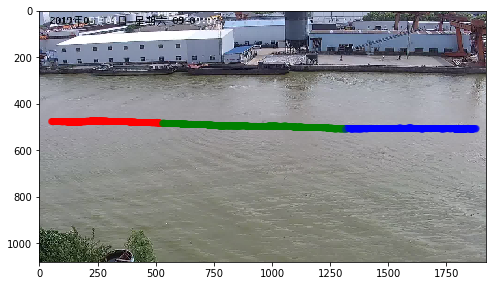

9 1038


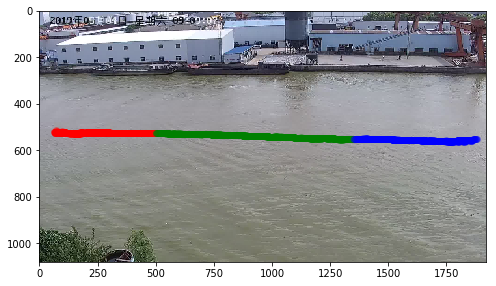

10 1020


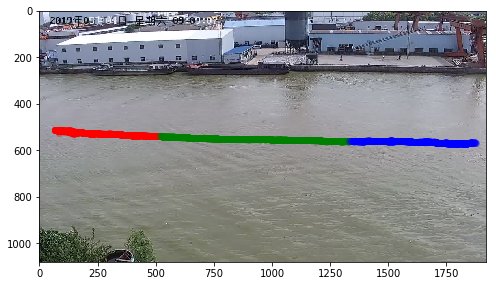

11 947


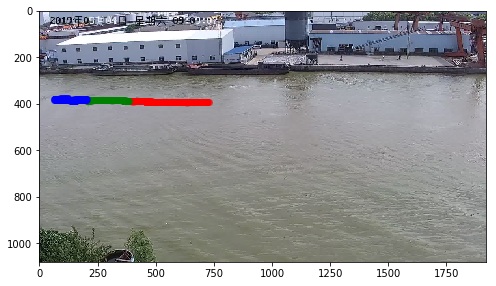

12 2


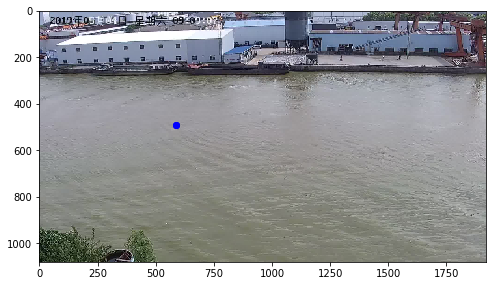

In [14]:
for idx,chain in enumerate(sorted([chain for chain in collected['chain_list']], reverse=True, key=len)[:21]):
    pt_arr = np.array([box['pt'] for box in chain])
    pt_smoothed_arr = np.array([box['pt_smoothed'] for box in chain])
    if len(pt_arr) <2:
        print('suppressed')
        continue
    print(idx,len(pt_arr))
    x,y = pt_arr[:,::2].mean(axis=1),pt_arr[:,1::2].mean(axis=1)
    x_bar,y_bar = pt_smoothed_arr[:,::2].mean(axis=1),pt_smoothed_arr[:,1::2].mean(axis=1)
    
    plt.figure(figsize=(8,6))
    plot_trace(x_bar, y_bar)
    plot_trace(x,y, alpha=0.3)
    plt.imshow(background)
    plt.show()

In [15]:
chain_list = sorted([chain for chain in collected['chain_list']], reverse=True, key=len)

In [17]:
chain_list[7][:3]

[{'score': tensor(0.1614, device='cpu'),
  'label_name': 'boat',
  'pt': array([1806.6632 ,  382.71368, 1929.7865 ,  468.5652 ], dtype=float32),
  'matched': True,
  'head': True,
  'frame': 8406,
  'pt_smoothed': array([1780.9147 ,  384.01004, 1926.459  ,  470.0105 ], dtype=float32),
  'pt_smoothed_next': array([1780.317 ,  384.0367, 1926.3956,  470.0334], dtype=float32),
  'pt_next': array([1809.1469,  379.8716, 1930.753 ,  471.3138], dtype=float32),
  'delta': array([-0.33044434,  0.02478027], dtype=float32),
  'delta_smoothed': array([-0.34275207,  0.02022247], dtype=float32),
  'chain': <test_batch.DummyPointer at 0x177f7fdd978>},
 {'score': tensor(0.2148, device='cpu'),
  'label_name': 'boat',
  'pt': array([1809.1469,  379.8716, 1930.753 ,  471.3138], dtype=float32),
  'matched': True,
  'frame': 8411,
  'pt_smoothed': array([1780.317 ,  384.0367, 1926.3956,  470.0334], dtype=float32),
  'pt_smoothed_next': array([1779.7319 ,  384.06277, 1926.3508 ,  470.04913], dtype=float32),


In [18]:
chain_list[7][-3:]

[{'score': tensor(0.1983, device='cpu'),
  'label_name': 'boat',
  'pt': array([ 399.7957 ,  355.368  , 1345.1826 ,  445.86365], dtype=float32),
  'matched': True,
  'frame': 9565,
  'pt_smoothed': array([ 419.5667 ,  357.11407, 1371.0676 ,  447.37592], dtype=float32),
  'pt_smoothed_next': array([ 419.10025,  357.093  , 1370.4271 ,  447.35278], dtype=float32),
  'pt_next': array([ 395.6338 ,  355.93533, 1338.5273 ,  446.34967], dtype=float32),
  'delta': array([-0.5534668 , -0.02209473], dtype=float32),
  'delta_smoothed': array([-0.56779784, -0.0212883 ], dtype=float32),
  'chain': <test_batch.DummyPointer at 0x177f67d28d0>},
 {'score': tensor(0.1779, device='cpu'),
  'label_name': 'boat',
  'pt': array([ 395.6338 ,  355.93533, 1338.5273 ,  446.34967], dtype=float32),
  'matched': True,
  'frame': 9566,
  'pt_smoothed': array([ 419.10025,  357.093  , 1370.4271 ,  447.35278], dtype=float32),
  'pt_smoothed_next': array([ 418.6484 ,  357.07333, 1369.8125 ,  447.33026], dtype=float32),


In [19]:
chain_list[11][:3]

[{'score': tensor(0.1582, device='cpu'),
  'label_name': 'boat',
  'pt': array([ 279.86606,  354.83978, 1180.5177 ,  428.33484], dtype=float32),
  'matched': True,
  'head': True,
  'frame': 9679,
  'pt_smoothed': array([ 257.43835,  355.31607, 1150.9226 ,  428.31494], dtype=float32),
  'pt_smoothed_next': array([ 256.92032,  355.3307 , 1150.1174 ,  428.33386], dtype=float32),
  'pt_next': array([ 277.24878,  355.39633, 1163.5668 ,  428.8127 ], dtype=float32),
  'delta': array([-0.6616211 ,  0.01678467], dtype=float32),
  'delta_smoothed': array([-0.6763031 ,  0.01075668], dtype=float32),
  'chain': <test_batch.DummyPointer at 0x177f67d2978>},
 {'score': tensor(0.1816, device='cpu'),
  'label_name': 'boat',
  'pt': array([ 277.24878,  355.39633, 1163.5668 ,  428.8127 ], dtype=float32),
  'matched': True,
  'frame': 9680,
  'pt_smoothed': array([ 256.92032,  355.3307 , 1150.1174 ,  428.33386], dtype=float32),
  'pt_smoothed_next': array([ 256.32703,  355.33762, 1149.4557 ,  428.3311 ], 

这里看起来序列7（末帧9567）与序列11（初帧9679）也应该是一起的，中间出现了大量的漏检使得两者断开了。

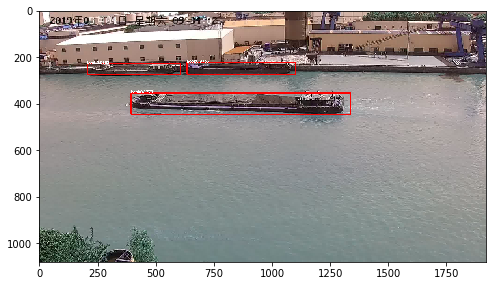

In [23]:
processed = test_basic(net, r'E:\ship_detect_demo\hiv00803_frames\thumb09567.jpg', threshold=0.15)
plt.figure(figsize=(8,6))
plt.imshow(processed)

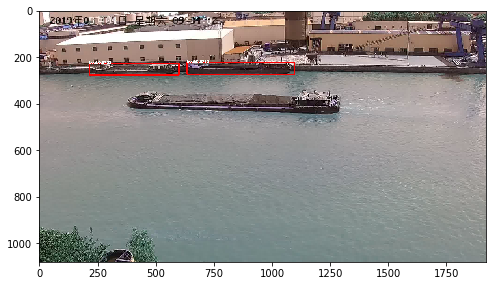

In [24]:
processed = test_basic(net, r'E:\ship_detect_demo\hiv00803_frames\thumb09577.jpg', threshold=0.15)
plt.figure(figsize=(8,6))
plt.imshow(processed)

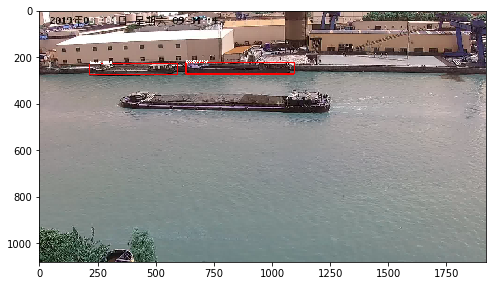

In [25]:
processed = test_basic(net, r'E:\ship_detect_demo\hiv00803_frames\thumb09610.jpg', threshold=0.15)
plt.figure(figsize=(8,6))
plt.imshow(processed)

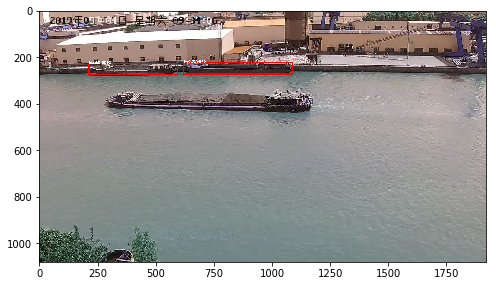

In [26]:
processed = test_basic(net, r'E:\ship_detect_demo\hiv00803_frames\thumb09669.jpg', threshold=0.15)
plt.figure(figsize=(8,6))
plt.imshow(processed)

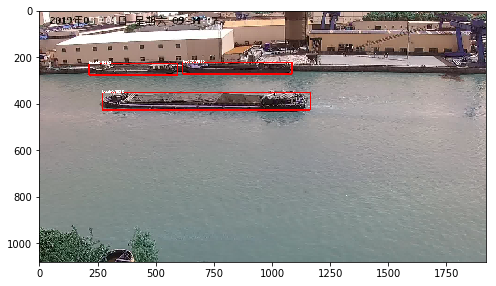

In [28]:
processed = test_basic(net, r'E:\ship_detect_demo\hiv00803_frames\thumb09689.jpg', threshold=0.15)
plt.figure(figsize=(8,6))
plt.imshow(processed)

仅通过降低阈值看看

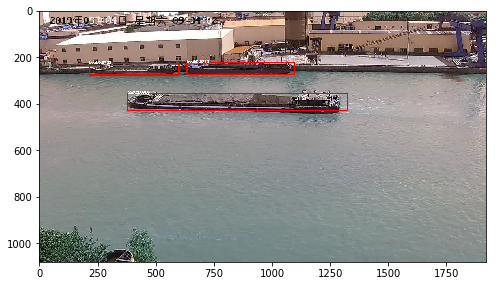

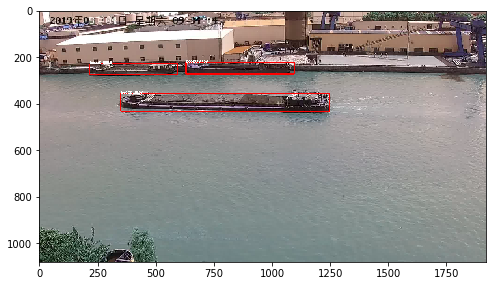

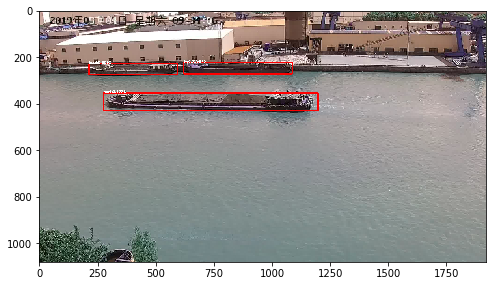

In [33]:
threshold = 0.05

processed = test_basic(net, r'E:\ship_detect_demo\hiv00803_frames\thumb09577.jpg', threshold=threshold)
plt.figure(figsize=(8,6))
plt.imshow(processed)

processed = test_basic(net, r'E:\ship_detect_demo\hiv00803_frames\thumb09610.jpg', threshold=threshold)
plt.figure(figsize=(8,6))
plt.imshow(processed)

processed = test_basic(net, r'E:\ship_detect_demo\hiv00803_frames\thumb09669.jpg', threshold=threshold)
plt.figure(figsize=(8,6))
plt.imshow(processed)

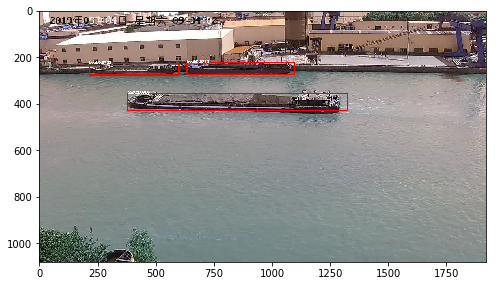

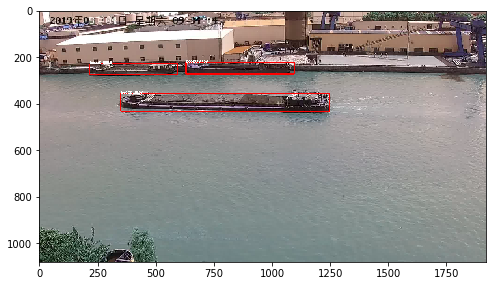

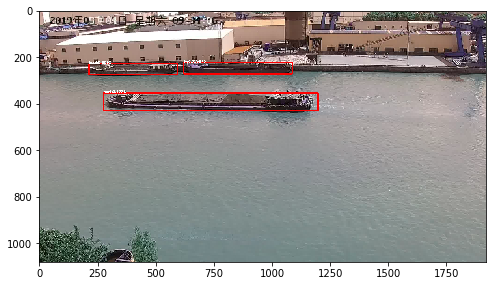

In [34]:
threshold = 0.075

processed = test_basic(net, r'E:\ship_detect_demo\hiv00803_frames\thumb09577.jpg', threshold=threshold)
plt.figure(figsize=(8,6))
plt.imshow(processed)

processed = test_basic(net, r'E:\ship_detect_demo\hiv00803_frames\thumb09610.jpg', threshold=threshold)
plt.figure(figsize=(8,6))
plt.imshow(processed)

processed = test_basic(net, r'E:\ship_detect_demo\hiv00803_frames\thumb09669.jpg', threshold=threshold)
plt.figure(figsize=(8,6))
plt.imshow(processed)

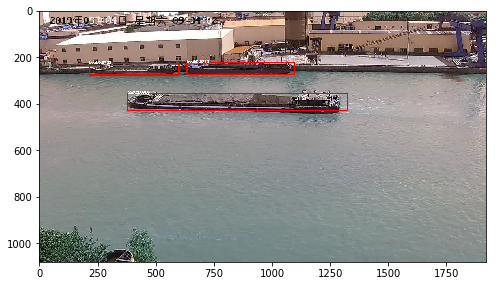

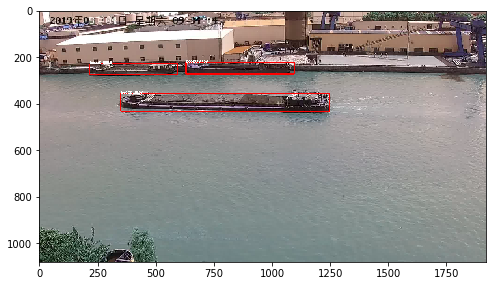

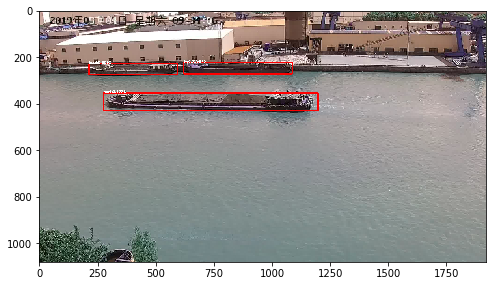

In [36]:
threshold = 0.09

processed = test_basic(net, r'E:\ship_detect_demo\hiv00803_frames\thumb09577.jpg', threshold=threshold)
plt.figure(figsize=(8,6))
plt.imshow(processed)

processed = test_basic(net, r'E:\ship_detect_demo\hiv00803_frames\thumb09610.jpg', threshold=threshold)
plt.figure(figsize=(8,6))
plt.imshow(processed)

processed = test_basic(net, r'E:\ship_detect_demo\hiv00803_frames\thumb09669.jpg', threshold=threshold)
plt.figure(figsize=(8,6))
plt.imshow(processed)